# Logistic Regression steps-
- Data Preparation and Normalization
- visualisation
- Create test and train datasets
- Create Logistic regression Model
- predictions
- Decision boundary
- Using SKlearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### DATA PREPARATION
- We will make two class of data one with 0 and other with 1
- We will make multivariate normal distribution


In [2]:
mean_1 = np.array([1,1.5])
covariance_1 = np.array([[1,0.1],[0.1,2]])

mean_2= np.array([5,6])
covariance_2 = np.array([[1.5,0.1],[0.1,2.3]])

dist_1 = np.random.multivariate_normal(mean_1,covariance_1,500)
dist_2 = np.random.multivariate_normal(mean_2,covariance_2,500)

dist_1.shape,dist_2.shape


((500, 2), (500, 2))

### VISUALIZE

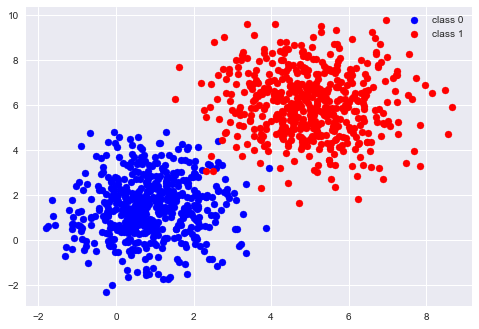

In [3]:
plt.style.use("seaborn")
plt.scatter(dist_1[:,0],dist_1[:,1],color="blue",label="class 0")
plt.scatter(dist_2[:,0],dist_2[:,1],color="red",label="class 1")
plt.legend()
plt.show()


### We want  dist_1,dist_2 to be together in a single matrix 
- First 500 rows will have dist_1 feature X1,X2
- next 500 rows will have dist_2 feature X1,X2
- then we will add a column containing Y values i.e 1 or 0
- Now shuffle the whole data matrix

In [14]:
data = np.zeros((1000,3))
data[:500,:2] = dist_1
data[500:,:2] = dist_2
data[:500,2] = 0
data[500:,2] = 1
np.random.shuffle(data)
data[:10,:]


array([[ 5.41395101,  6.30385466,  1.        ],
       [ 3.57830918,  5.89781323,  1.        ],
       [-0.20658371,  1.15914268,  0.        ],
       [ 5.50006142,  5.61587346,  1.        ],
       [ 4.92416261,  8.13823024,  1.        ],
       [ 0.14213681,  0.35847551,  0.        ],
       [ 2.58777326,  3.21469881,  0.        ],
       [ 5.63644652,  3.32031505,  1.        ],
       [ 0.96991442,  2.31143929,  0.        ],
       [ 5.29537208,  4.28734739,  1.        ]])

# SPLIT INTO TEST AND TRAIN

In [93]:
split = int(0.8*data.shape[0])

X_train= data[:split,:2]
X_test = data[split:,:2]

Y_train = data[:split,-1]
Y_test = data[split:,-1]

Y_train.reshape(-1,1)
Y_test.reshape(-1,1)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


### NORMALISATION

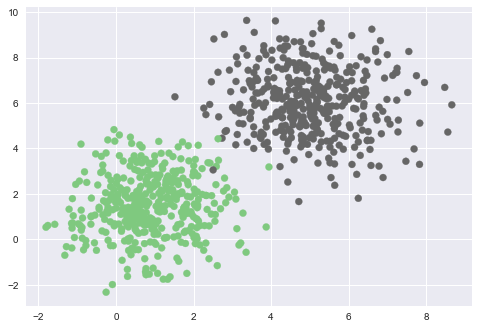

In [94]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap = plt.cm.Accent)
plt.show()

#### We will find mean and std column wise i.e axis = 0

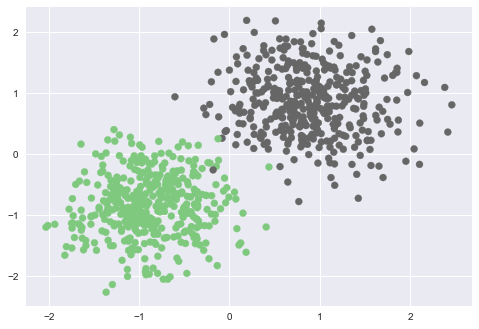

In [95]:
u = np.mean(X_train,axis=0)
std = np.std(X_train,axis=0)

X_train = (X_train-u)/std
X_test = (X_test - u)/std

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap = plt.cm.Accent)
plt.show()

# IMPLEMENTATION

In [109]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X,theta):
    """
    X - entire array(m,n+1)
    theta - np.array(n+1,1)
    """
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    """
    X - m,n+1
    y - m,1
    theta - n+1,1
    """
    e = -1*np.mean(y*np.log(hypothesis(X,theta))+((1-y)*np.log(1-hypothesis(X,theta))))
    return e

def gradient(X,y,theta):
    """
    X - m,n+1
    y - m,1
    theta - n+1,1
    ----return----- 
    grad_vector = (n+1,1)
    """
    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(y-hi))
    return grad/X.shape[0]
                  
def gradient_descent(X,y,learning_rate=0.5,epochs=200):
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    for i in range (epochs):
        e = error(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        theta = theta + learning_rate*grad
    return error_list,theta

## Now we will append a ones column as X0 feature and get theta


In [135]:
X0 = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((X0,X_train))
X0 = np.ones((X_test.shape[0],1))
X_new_test = np.hstack((X0,X_test))
print(X_new_train.shape)
print(X_new_train)

Y_train = Y_train.reshape((-1,1))

error_list,theta = gradient_descent(X_new_train,Y_train)

(800, 3)
[[ 1.          1.06824943  0.95272355]
 [ 1.          0.28016785  0.80158115]
 [ 1.         -1.34477026 -0.96231287]
 ...
 [ 1.         -0.03273712  0.38864869]
 [ 1.         -0.6234554  -0.38963261]
 [ 1.         -0.91572421 -0.76553658]]


array([[0.01230594],
       [3.29547579],
       [2.96342964]])

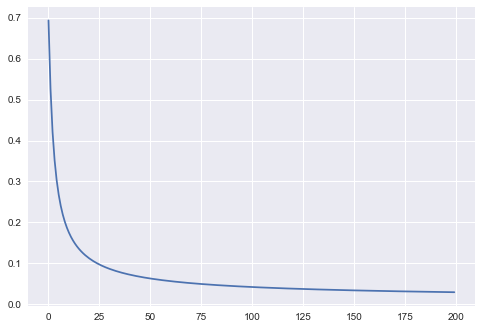

In [118]:
plt.plot(error_list)
theta

## VISUALISATION OF SURFACE BOUNDARY

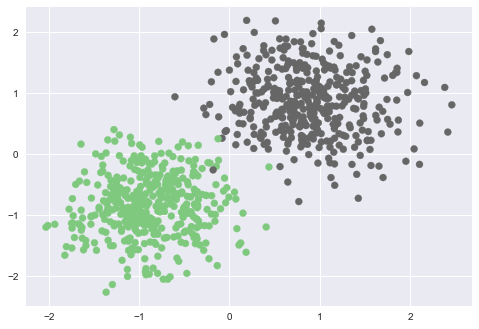

In [125]:
#c parameter expects a sequence not a column vector reshape it
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape(-1,),cmap = plt.cm.Accent)
plt.show()


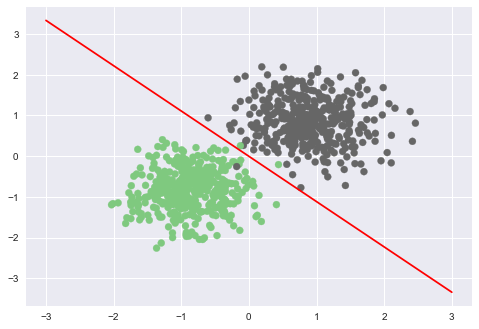

In [131]:
x1 = np.arange(-3,4)
#expresss x2 in form of X1
x2 = -(theta[0]+theta[1]*x1)/theta[2]
plt.plot(x1,x2,color="red")
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape(-1,),cmap = plt.cm.Accent)
plt.show()

# Just to show how sigmoid function looks like

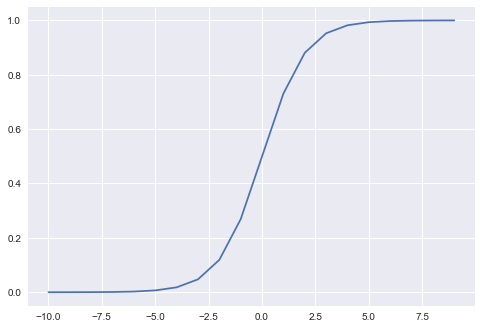

In [45]:
a = np.arange(-10,10,1)
plt.plot(a,sigmoid(a))
plt.show()

### DIFFERENCE BETWEEN ELEMENT WISE PRODUCT AND MATRIX PRODUCT

In [49]:
mat1 = np.array([[1, 6, 5],[3 ,4, 8],[2, 12, 3]]) 
mat2 = np.array([[3, 4, 6],[5, 6, 7],[6,56, 7]])
#matrix multiply
print(np.dot(mat1,mat2))
#element wise
print(mat1*mat2)

[[ 63 320  83]
 [ 77 484 102]
 [ 84 248 117]]
[[  3  24  30]
 [ 15  24  56]
 [ 12 672  21]]


# PREDICTIONS
- h will lie between 0 1

In [137]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros((h.shape))
    output[h>=0.5] = 1
    ouptut = output.astype('int')
    return output

XT_preds=predict(X_new_train,theta)
Xt_preds = predict(X_new_test,theta)
print(XT_preds.shape,Xt_preds.shape)

(800, 1) (200, 1)


In [164]:
def accuracy(actual,pred):
    #convert actual values to int
    actual = actual.astype("int")
    #check both have equal shape
    actual = actual.reshape((-1,1))
    return(np.sum(actual==pred)/actual.shape[0])*100

In [165]:
print(accuracy(Y_train,XT_preds))
print(accuracy(Y_test,Xt_preds))

99.625
98.5


# SKLEARN

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
model = LogisticRegression()

In [175]:
model.fit(X_train,Y_train.reshape(-1,))

LogisticRegression()

In [176]:
theta0 = model.intercept_
theta_sklearn = model.coef_
print(theta0,theta_sklearn)

[0.04331908] [[3.9600693 3.5039584]]


In [178]:
model.score(X_train,Y_train)

0.99625

In [179]:
model.score(X_test,Y_test)

0.985

In [181]:
model.predict(X_test)

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.])